In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 26.2 MB/s eta 0:00:00


In [ ]:
import re
import os
import string
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download(['punkt', 'stopwords'])
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
#Counter
from collections import Counter
#transformers
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
os.chdir("/content/drive/MyDrive/Teknofest-Hive Heroes/sentiment_analiz_example/")

In [ ]:
STOPWORDS_FILEPATH_opt3 = "data/stopwords_tr.txt"
DATA_PATH="train_with_preprocess_nolemma.csv"

In [ ]:
df = pd.read_csv(DATA_PATH,encoding="utf-8")
df.head()

,id,text,is_offensive,target,y_target_number,preprocessed_text,first_p_sec_sw,tkn_p_sw,str_tkn_p_sw
0,81c11060-a240-4d54-841b-9e2916039e85,çürük dişli,1,INSULT,0,çürük dişli,çürük dişli,"['çürük', 'dişli']",çürük dişli
1,be80ebbf-b322-4c3b-afa1-94932ea80731,Bu adamın islama ve müslümanlara verdiği zarar...,1,RACIST,3,bu adamın islama ve müslümanlara verdiği zarar...,adamın islama müslümanlara verdiği zararı gavu...,"['adamın', 'islama', 'müslümanlara', 'verdiği'...",adamın islama müslümanlara verdiği zararı gavu...
2,f99e2513-83ed-4076-ac72-b9e2cff3f049,erkekler zora gelmez,1,SEXIST,4,erkekler zora gelmez,erkekler zora gelmez,"['erkekler', 'zora', 'gelmez']",erkekler zora gelmez
3,83ed2b2e-b815-4f36-9fc4-80a9050cf2d0,Utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,1,PROFANITY,2,utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,utanmazın götüne kazık sokmuşlar tıkırtı nered...,"['utanmazın', 'götüne', 'kazık', 'sokmuşlar', ...",utanmazın götüne kazık sokmuşlar tıkırtı nered...
4,d93e05f7-bfdd-4cdb-99d8-3048761b30ff,otomasyon< sistemlerine= doğrudan bağlanabilir,0,OTHER,1,otomasyon sistemlerine doğrudan bağlanabilir,otomasyon sistemlerine doğrudan bağlanabilir,"['otomasyon', 'sistemlerine', 'doğrudan', 'bağ...",otomasyon sistemlerine doğrudan bağlanabilir


In [ ]:
df.head(7)

,id,text,is_offensive,target,y_target_number,preprocessed_text,first_p_sec_sw,tkn_p_sw,str_tkn_p_sw
0,81c11060-a240-4d54-841b-9e2916039e85,çürük dişli,1,INSULT,0,çürük dişli,çürük dişli,"['çürük', 'dişli']",çürük dişli
1,be80ebbf-b322-4c3b-afa1-94932ea80731,Bu adamın islama ve müslümanlara verdiği zarar...,1,RACIST,3,bu adamın islama ve müslümanlara verdiği zarar...,adamın islama müslümanlara verdiği zararı gavu...,"['adamın', 'islama', 'müslümanlara', 'verdiği'...",adamın islama müslümanlara verdiği zararı gavu...
2,f99e2513-83ed-4076-ac72-b9e2cff3f049,erkekler zora gelmez,1,SEXIST,4,erkekler zora gelmez,erkekler zora gelmez,"['erkekler', 'zora', 'gelmez']",erkekler zora gelmez
3,83ed2b2e-b815-4f36-9fc4-80a9050cf2d0,Utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,1,PROFANITY,2,utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,utanmazın götüne kazık sokmuşlar tıkırtı nered...,"['utanmazın', 'götüne', 'kazık', 'sokmuşlar', ...",utanmazın götüne kazık sokmuşlar tıkırtı nered...
4,d93e05f7-bfdd-4cdb-99d8-3048761b30ff,otomasyon< sistemlerine= doğrudan bağlanabilir,0,OTHER,1,otomasyon sistemlerine doğrudan bağlanabilir,otomasyon sistemlerine doğrudan bağlanabilir,"['otomasyon', 'sistemlerine', 'doğrudan', 'bağ...",otomasyon sistemlerine doğrudan bağlanabilir
5,81eca520-15a0-4f5b-a1dd-5929bba34bdc,amını siktiğimin yarrağı,1,PROFANITY,2,amını siktiğimin yarrağı,amını siktiğimin yarrağı,"['amını', 'siktiğimin', 'yarrağı']",amını siktiğimin yarrağı
6,a2497690-5201-4c28-bdb8-4206ea672765,ekipte bir cücemiz eksikti o da oldu,1,INSULT,0,ekipte bir cücemiz eksikti o da oldu,ekipte cücemiz eksikti oldu,"['ekipte', 'cücemiz', 'eksikti', 'oldu']",ekipte cücemiz eksikti oldu


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def vectorizer_methods(X_train, X_test, option):
  if option==0: #tf-idf bu daha iyi çıktı aslında
    vectorizer = TfidfVectorizer()

  elif option==1: #boW
    vectorizer= CountVectorizer()
  X_train = vectorizer.fit_transform(X_train)
  X_test = vectorizer.transform(X_test)
  return X_train,X_test

In [ ]:
def model_Evaluate(model=None,model_name=str,X_test_vec=None,y_test=None,opt=None,y_pred=None): #for is_offensive
  
# Predict values for Test dataset
  
  if opt==0:
    y_pred = model.predict(X_test_vec)
  # Print the evaluation metrics for the dataset.
  elif opt==1:
    threshold = 0.5
    y_pred=model.predict(X_test_vec)
    y_pred= np.where(y_pred >= threshold, 1, 0) 
  elif opt==2:
    pass
  print(classification_report(y_test, y_pred))
  # Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title (model_name, fontdict = {'size':18}, pad = 20)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  roc_auc = auc(fpr, tpr)
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC CURVE')
  plt.legend(loc="lower right")
  plt.show()
  return y_pred

#Sentiment Analysis

In [ ]:
#load model and tokenizer
#https://huggingface.co/savasy/bert-base-turkish-sentiment-cased
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
model = AutoModelForSequenceClassification.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
tokenizer = AutoTokenizer.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
# create pipeline
sa = pipeline("sentiment-analysis", tokenizer=tokenizer, model=model)

In [ ]:
def get_sentiment_analysis(tweet):
    """True if tweet has positive compound sentiment, False otherwise."""
    p = sa(str(tweet))
    #print("label", p[0]["label"])
    #print("score", round(p[0]["score"],4))
    return pd.Series([p[0]["label"], round(p[0]["score"],4)])

In [ ]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.metrics import roc_curve, auc
def sentiment_analiz(model_opt,X,y):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)
  X_train_vec, X_test_vec = vectorizer_methods(X_train,X_test, 1)
  if model_opt==1:
    model = BernoulliNB()
    model_name = "Bernoulli NB"
  elif model_opt==2:
    model = LinearSVC()
    model_name = "Linear SVC"
  elif model_opt==3:
    model = DecisionTreeClassifier()
    model_name = "Decision Tree Classifier"
  elif model_opt==4:
    model = XGBClassifier()
    model_name = "XGB Classifier"
  model.fit(X_train_vec, y_train)
  #model=None,X_test_vec=None,y_test=None,opt=None,y_pred=None
  y_pred= model_Evaluate(model=model,model_name=model_name,X_test_vec=X_test_vec,y_test=y_test,opt=0)

  return y_pred

In [ ]:
from keras.layers import LSTM, Dense, Embedding, Dropout
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
#from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import RMSprop

def lstm_model(X,y_number,num_class):
  X_train, X_test, y_train, y_test = train_test_split(X, y_number, test_size=0.02, random_state=42)
  tokenizer = Tokenizer(num_words=5000, lower=True)
  tokenizer.fit_on_texts(X_train)
  X_train = tokenizer.texts_to_sequences(X_train)
  X_test = tokenizer.texts_to_sequences(X_test)
  y_train_cat = to_categorical(y_train, num_classes=num_class)
  y_test_cat = to_categorical(y_test, num_classes=num_class)
  max_len = len(max(X_train, key=len))
  X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
  X_test = pad_sequences(X_test, padding='post', maxlen=max_len)
  model = Sequential()
  model.add(Embedding(input_dim=5000, output_dim=50, input_length=max_len))
  model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
  model.add(Dense(units=num_class, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat), epochs=10, batch_size=64)
  return [model,X_test,y_test]

In [ ]:
X=df.str_tkn_p_sw
y=df.is_offensive

              precision    recall  f1-score   support

           0       0.96      0.27      0.42       190
           1       0.76      1.00      0.86       434

    accuracy                           0.77       624
   macro avg       0.86      0.63      0.64       624
weighted avg       0.82      0.77      0.73       624



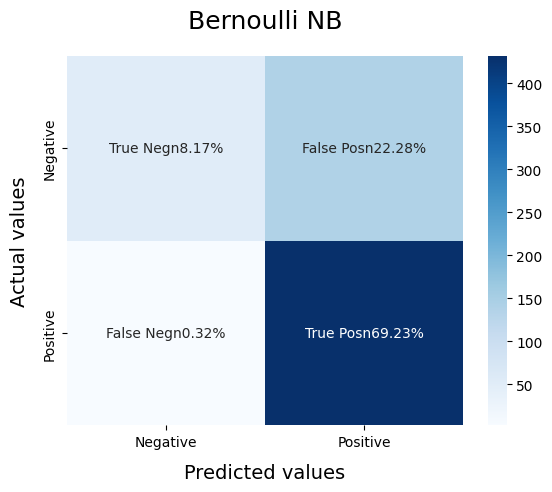

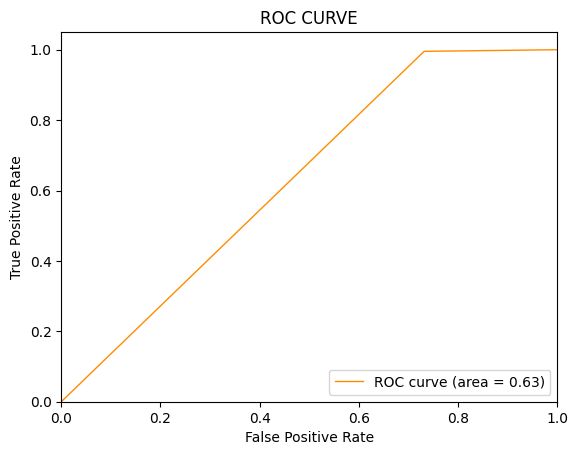

In [ ]:
#model=None,X_test_vec=None,y_test=None,opt=None,y_pred=None
pred=sentiment_analiz(1,X,y)

              precision    recall  f1-score   support

           0       0.86      0.66      0.75       190
           1       0.87      0.95      0.91       434

    accuracy                           0.87       624
   macro avg       0.86      0.81      0.83       624
weighted avg       0.87      0.87      0.86       624



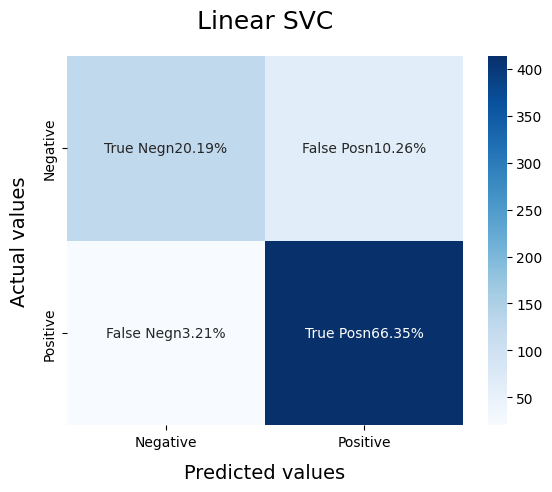

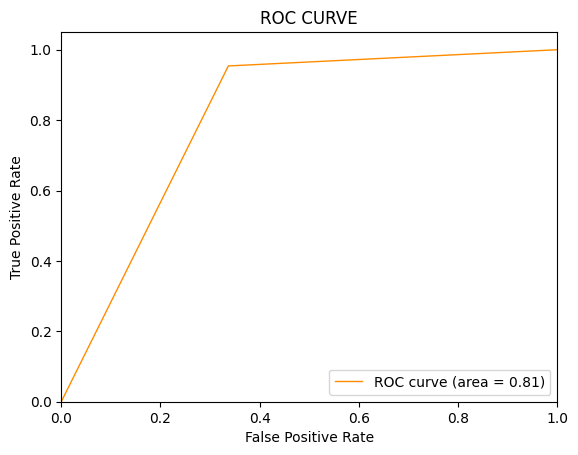

In [ ]:
pred=sentiment_analiz(2,X,y)

              precision    recall  f1-score   support

           0       0.72      0.59      0.65       190
           1       0.84      0.90      0.87       434

    accuracy                           0.81       624
   macro avg       0.78      0.75      0.76       624
weighted avg       0.80      0.81      0.80       624



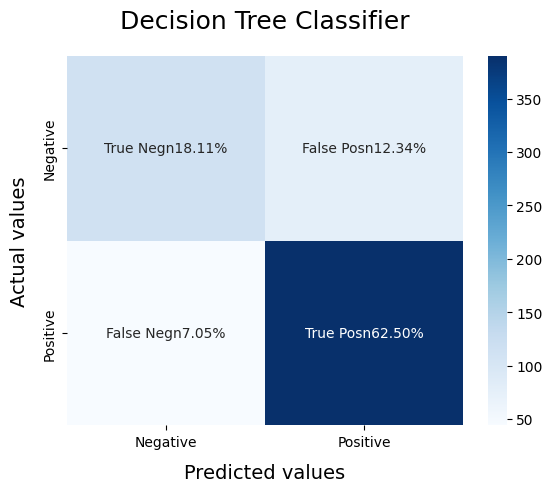

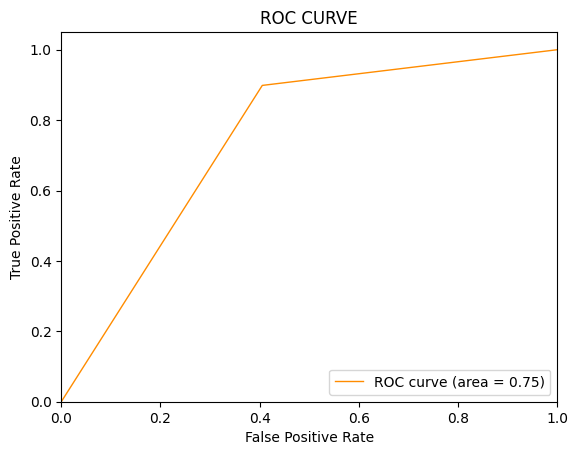

In [ ]:
pred=sentiment_analiz(3,X,y)

              precision    recall  f1-score   support

           0       0.84      0.34      0.49       190
           1       0.77      0.97      0.86       434

    accuracy                           0.78       624
   macro avg       0.81      0.66      0.67       624
weighted avg       0.79      0.78      0.75       624



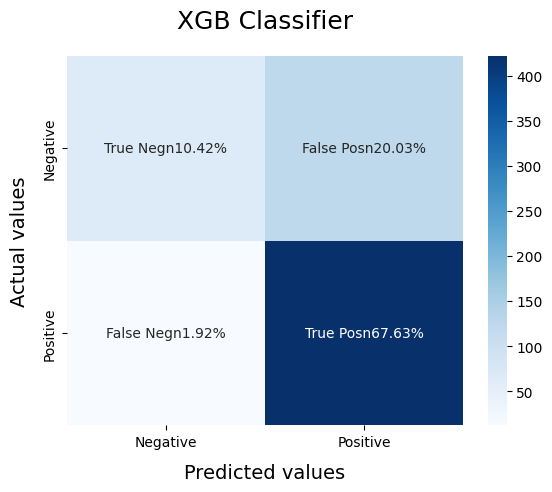

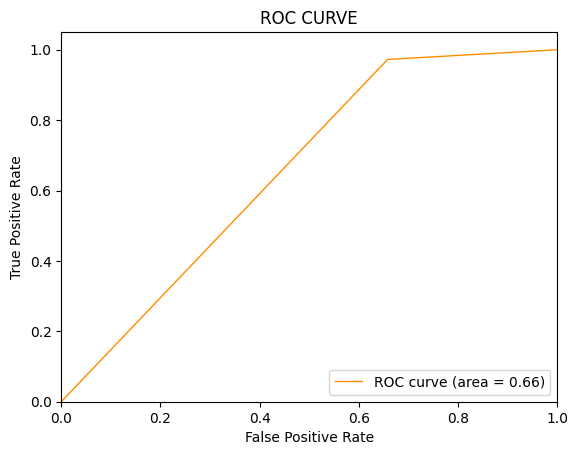

In [ ]:
pred=sentiment_analiz(4,X,y)

LSTM


In [ ]:
lstm_model,X_test,y_test=lstm_model(X,y,2)

Epoch 1/10
191/191 [==============================] - 40s 168ms/step - loss: 0.4104 - accuracy: 0.8138 - val_loss: 0.2904 - val_accuracy: 0.8640
Epoch 2/10
191/191 [==============================] - 20s 107ms/step - loss: 0.2024 - accuracy: 0.9217 - val_loss: 0.2755 - val_accuracy: 0.8880
Epoch 3/10
191/191 [==============================] - 20s 103ms/step - loss: 0.1523 - accuracy: 0.9426 - val_loss: 0.2717 - val_accuracy: 0.8720
Epoch 4/10
191/191 [==============================] - 20s 102ms/step - loss: 0.1345 - accuracy: 0.9475 - val_loss: 0.2842 - val_accuracy: 0.9080
Epoch 5/10
191/191 [==============================] - 17s 87ms/step - loss: 0.1163 - accuracy: 0.9585 - val_loss: 0.2872 - val_accuracy: 0.8800
Epoch 6/10
191/191 [==============================] - 17s 92ms/step - loss: 0.1049 - accuracy: 0.9595 - val_loss: 0.2704 - val_accuracy: 0.9080
Epoch 7/10
191/191 [==============================] - 17s 88ms/step - loss: 0.0953 - accuracy: 0.9620 - val_loss: 0.2666 - val_accur

In [ ]:
y_pred= model_Evaluate(lstm_model,model_name="LSTM",X_test_vec= X_test,y_test=y_test,opt=1)
#model=None,model_name=str,X_test_vec=None,y_test=None,opt=None,y_pred=None,

8/8 [==============================] - 0s 6ms/step


ValueError: ignored

Bert Model

In [ ]:
data=df

In [ ]:
data["sentiment_label"] = "-"
data["sentiment_score"] = -1
data[["sentiment_label", "sentiment_score"]] = data["text"].apply(get_sentiment_analysis)
data['sentiment_score'].apply(lambda x: float(x))
y_pred = np.where(data['sentiment_label'] =="positive", 0, 1) # DataFrame sütunundaki değerlere göre yuvarlama işlemi
y_test=data["is_offensive"]
model_Evaluate(y_test=y_test,opt=2,y_pred=y_pred)


#Target Classification

In [ ]:
X=df.str_tkn_p_sw
y=df.target
y_number=df.y_target_number


In [ ]:
def conf_matrix(y_test,y_pred):
  cm = confusion_matrix(y_test,y_pred, normalize="true")
  sns.heatmap(cm, annot=True, cmap="Blues",xticklabels=["INSULT","OTHER","PROFANITY","RACIST","SECIST"],yticklabels=["INSULT","OTHER","PROFANITY","RACIST","SECIST"] )
  plt.xlabel('Tahmin Edilen Sınıf')
  plt.ylabel('Gerçek Sınıf')
  plt.show()

In [ ]:
def multiple_choic(X,y,opt):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
  X_train_boW, X_test_boW=vectorizer_methods(X_train,X_test, 0)
  if opt==0: #y_train and test are str
    svc_model = LinearSVC()
    svc_model.fit(X_train_boW, y_train)
    y_pred=svc_model.predict(X_test_boW)
    print(classification_report(y_test, y_pred, digits = 4))
    conf_matrix(y_test,y_pred)
  elif opt==1: #y_train and test are int
    xgboost_model = XGBClassifier()
    xgboost_model.fit(X_train_boW, y_train)
    y_pred=xgboost_model.predict(X_test_boW)
    print(classification_report(y_test, y_pred, digits = 4))
    conf_matrix(y_test,y_pred)
  elif opt==2:
    model,X_test,y_test=lstm_model(X,y,num_class=5)
    y_pred=model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    print(classification_report(y_test, y_pred, digits = 4))
    conf_matrix(y_test,y_pred)
  elif opt==3:
    model,X_test,y_test=DecisionTreeClassifier(X,y,num_class=5)
    y_pred=model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    print(classification_report(y_test, y_pred, digits = 4))
    conf_matrix(y_test,y_pred)


              precision    recall  f1-score   support

      INSULT     0.7219    0.7201    0.7210      1161
       OTHER     0.7646    0.8550    0.8073      1835
   PROFANITY     0.9082    0.8360    0.8706      1171
      RACIST     0.8735    0.7677    0.8172      1016
      SEXIST     0.8813    0.8830    0.8821      1051

    accuracy                         0.8168      6234
   macro avg     0.8299    0.8124    0.8196      6234
weighted avg     0.8210    0.8168    0.8173      6234



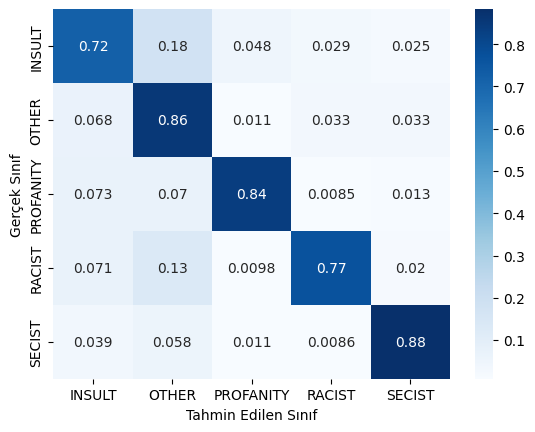

In [ ]:
multiple_choic(X,y,0)

              precision    recall  f1-score   support

           0     0.6833    0.5202    0.5907      1161
           1     0.5748    0.8937    0.6997      1835
           2     0.9646    0.7216    0.8256      1171
           3     0.9282    0.5856    0.7182      1016
           4     0.8765    0.8173    0.8459      1051

    accuracy                         0.7287      6234
   macro avg     0.8055    0.7077    0.7360      6234
weighted avg     0.7767    0.7287    0.7307      6234



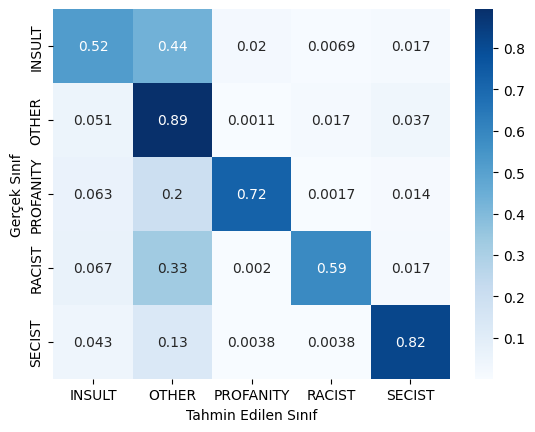

In [ ]:
multiple_choic(X,y_number,1)

Epoch 1/10
191/191 [==============================] - 44s 188ms/step - loss: 1.2435 - accuracy: 0.4649 - val_loss: 0.8720 - val_accuracy: 0.6760
Epoch 2/10
191/191 [==============================] - 36s 187ms/step - loss: 0.5927 - accuracy: 0.7867 - val_loss: 0.6888 - val_accuracy: 0.7560
Epoch 3/10
191/191 [==============================] - 33s 171ms/step - loss: 0.4209 - accuracy: 0.8575 - val_loss: 0.6866 - val_accuracy: 0.7600
Epoch 4/10
191/191 [==============================] - 19s 101ms/step - loss: 0.3575 - accuracy: 0.8797 - val_loss: 0.6689 - val_accuracy: 0.7480
Epoch 5/10
191/191 [==============================] - 18s 93ms/step - loss: 0.3177 - accuracy: 0.8949 - val_loss: 0.6746 - val_accuracy: 0.7640
Epoch 6/10
191/191 [==============================] - 17s 88ms/step - loss: 0.2752 - accuracy: 0.9087 - val_loss: 0.7450 - val_accuracy: 0.7640
Epoch 7/10
191/191 [==============================] - 17s 90ms/step - loss: 0.2557 - accuracy: 0.9166 - val_loss: 0.7969 - val_accur

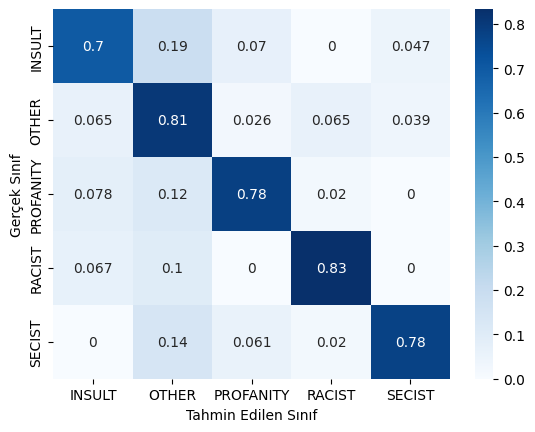

In [ ]:
multiple_choic(X,y_number,2)

In [ ]:
multiple_choic(X,y,3)

In [ ]:
num_class=5


X_train, X_test, y_train, y_test = train_test_split(X, y_number, test_size=0.02, random_state=42)

# Gönderilerin uzunluğunu eşitleyin (padding)
# Kelime seviyesinde Tokenization ve embedding yapmak için tokenizer oluşturun
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(X_train)

# Train ve test verilerinde Tokenization işlemi
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Hedef değişkeninizi 5 sınıfı olan bir çoklu-etiketleme formatına dönüştürün
y_train_cat = to_categorical(y_train, num_classes=num_class)
y_test_cat = to_categorical(y_test, num_classes=num_class)

# Her bir gönderinin maksimum uzunluğunu belirleyin
max_len = len(max(X_train, key=len))

# Gönderilerin uzunluğunu eşitleyin (padding)
X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
X_test = pad_sequences(X_test, padding='post', maxlen=max_len)

# Model oluşturma
model = Sequential()

# Embedding katmanı
model.add(Embedding(input_dim=5000, output_dim=50, input_length=max_len))

# LSTM katmanı
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))

# Tam bağlantı (fully connected) katmanı
model.add(Dense(units=num_class, activation='softmax'))

# Model derleme
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model eğitimi
model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat), epochs=10, batch_size=64)


Epoch 1/10
191/191 [==============================] - 28s 120ms/step - loss: 1.3087 - accuracy: 0.4280 - val_loss: 0.9998 - val_accuracy: 0.6480
Epoch 2/10
191/191 [==============================] - 12s 65ms/step - loss: 0.7077 - accuracy: 0.7375 - val_loss: 0.7147 - val_accuracy: 0.7280
Epoch 3/10
191/191 [==============================] - 14s 71ms/step - loss: 0.4794 - accuracy: 0.8369 - val_loss: 0.6985 - val_accuracy: 0.7440
Epoch 4/10
191/191 [==============================] - 16s 84ms/step - loss: 0.3847 - accuracy: 0.8715 - val_loss: 0.7304 - val_accuracy: 0.7720
Epoch 5/10
191/191 [==============================] - 13s 68ms/step - loss: 0.3410 - accuracy: 0.8877 - val_loss: 0.6568 - val_accuracy: 0.7720
Epoch 6/10
191/191 [==============================] - 11s 57ms/step - loss: 0.2992 - accuracy: 0.8993 - val_loss: 0.6579 - val_accuracy: 0.7800
Epoch 7/10
191/191 [==============================] - 13s 69ms/step - loss: 0.2536 - accuracy: 0.9153 - val_loss: 0.6906 - val_accuracy

In [ ]:
X_train

array([[  49,   19, 3109, ...,    0,    0,    0],
       [  26,  736, 1858, ...,    0,    0,    0],
       [ 669,    2,  158, ...,    0,    0,    0],
       ...,
       [2693,    0,    0, ...,    0,    0,    0],
       [   2,   48,  853, ...,    0,    0,    0],
       [   2, 2310,  229, ...,    0,    0,    0]], dtype=int32)

8/8 [==============================] - 1s 21ms/step
              precision    recall  f1-score   support

           0     0.6596    0.7209    0.6889        43
           1     0.7750    0.8052    0.7898        77
           2     0.9091    0.7843    0.8421        51
           3     0.8125    0.8667    0.8387        30
           4     0.8298    0.7959    0.8125        49

    accuracy                         0.7920       250
   macro avg     0.7972    0.7946    0.7944       250
weighted avg     0.7977    0.7920    0.7934       250



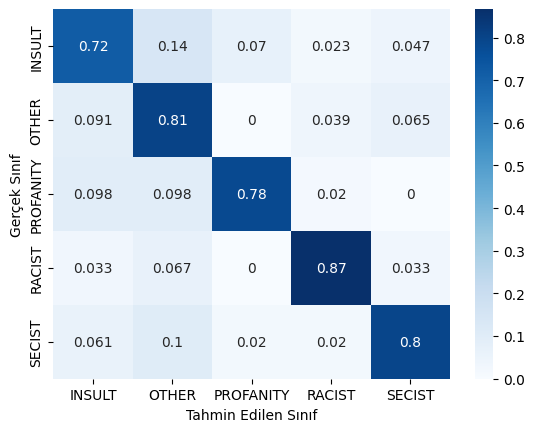

In [ ]:
y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred, digits = 4))
conf_matrix(y_test,y_pred)

In [ ]:
X=df.str_tkn_p_sw
y=df.y_target_number
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=42)
X_train, X_test= vectorizer_methods(X_train, X_test, 1)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Örnek veri oluşturma

# Sınıflandırıcıların oluşturulması
svc_clf = SVC(probability=True)
xgb_clf = XGBClassifier()
dt_clf = DecisionTreeClassifier()
knn_clf = KNeighborsClassifier()

# Oy verme sınıflandırıcısının oluşturulması
voting_clf = VotingClassifier(estimators=[('svc', svc_clf),  ('xgb', xgb_clf), ('lr', lr_clf), ('dt', dt_clf), ('knn', knn_clf)], voting='hard')

# Oy verme sınıflandırıcısının eğitilmesi ve değerlendirilmesi
voting_clf.fit(X_train, y_train)
print("Accuracy:", voting_clf.score(X_train, y_train))



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9829745436686584


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

0.7899083918671297

In [ ]:
# Code:
# import libraries
from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer, AutoModelForSequenceClassification
tokenizer= AutoTokenizer.from_pretrained("savasy/bert-turkish-text-classification")

# build and load model, it take time depending on your internet connection
model= AutoModelForSequenceClassification.from_pretrained("savasy/bert-turkish-text-classification")

# make pipeline
nlp=pipeline(model=model, tokenizer=tokenizer)

# apply model
nlp("bla bla")
# [{'label': 'LABEL_2', 'score': 0.4753005802631378}]
#INSULT","OTHER","PROFANITY","RACIST","SECIST"
code_to_label={
 'LABEL_0': 'INSULT ',
 'LABEL_1': "OTHER",
 'LABEL_2': "PROFANITY",
 'LABEL_3': "RACIST",
 'LABEL_4': "SEXIST",}
 
code_to_label[nlp("bla bla")[0]['label']]
# > 'kultur '

KeyError: ignored

In [ ]:
X=df.str_tkn_p_sw
y=df.y_target_number
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=42)

#y_train=pd.Categorical(y_train)
# Birleştirilmiş verilerinizi bir veri çerçevesine dönüştürün
Xy_train = pd.concat([X_train, y_train], axis=1)
X_train_df = pd.DataFrame(Xy_train)


In [ ]:
X_train

NameError: ignored

In [ ]:
train_df =  pd.concat([y_train, X_train], axis=1)

In [ ]:
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user


In [ ]:
train_df

,y_target_number,str_tkn_p_sw
10400,3,gavur izmirli olarak evime hataydan mağdur mis...
970,2,ananın amının düdüğü
7436,0,yalan senin ağzına yuva yapmış
7653,0,yardım istenecek son insansın
9450,2,yalanını sikeyim
...,...,...
11964,0,kadar korkak olmayıp beni korusan olurdu
5191,4,kadinlar surekli dir dir eder
5390,2,gay menisi
860,2,günes senin götüne koyarım bi doğarsan


In [ ]:
train_df.columns=["labels","text"]

In [ ]:
df.columns

Index(['id', 'text', 'is_offensive', 'target', 'y_target_number',
       'preprocessed_text', 'first_p_sec_sw', 'tkn_p_sw', 'str_tkn_p_sw'],
      dtype='object')

In [ ]:
df=df[[ "str_tkn_p_sw","target"]]
df

,str_tkn_p_sw,target
0,çürük dişli,INSULT
1,adamın islama müslümanlara verdiği zararı gavu...,RACIST
2,erkekler zora gelmez,SEXIST
3,utanmazın götüne kazık sokmuşlar tıkırtı nered...,PROFANITY
4,otomasyon sistemlerine doğrudan bağlanabilir,OTHER
...,...,...
12462,uyuma taklidi yapan tehlikeli hayvanın gözüne ...,OTHER
12463,yolda at kavga eden üç oğlan çocuğu görür,OTHER
12464,sizin köpeklerinizin burnu bile iyi koku alıyo...,OTHER
12465,hayalleri gerçek etmek birisinin delilik yapma...,OTHER


In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("dbmdz/bert-base-turkish-128k-uncased")



In [ ]:
labels = {'INSULT':0,
          'OTHER':1,
          'PROFANITY':2,
          'RACIST':3,
          'SEXIST':4
          }

In [ ]:

import torch
import numpy as np
from transformers import BertTokenizer
class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):

        self.labels = [labels[label] for label in df['target']]
        self.texts = [tokenizer(text, 
                               padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for text in df['str_tkn_p_sw']]

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

In [ ]:
np.random.seed(112)
df_train, df_val, df_test = np.split(df.sample(frac=1, random_state=42), 
                                     [int(.8*len(df)), int(.9*len(df))])

print(len(df_train),len(df_val), len(df_test))

9973 1247 1247


In [ ]:
from torch import nn
from transformers import BertModel

class BertClassifier(nn.Module):

    def __init__(self, dropout=0.5):

        super(BertClassifier, self).__init__()

        self.bert = BertModel.from_pretrained("dbmdz/bert-base-turkish-128k-uncased")
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 5)
        self.relu = nn.ReLU()

    def forward(self, input_id, mask):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        final_layer = self.relu(linear_output)

        return final_layer

In [ ]:
from torch.optim import Adam
from tqdm import tqdm

def train(model, train_data, val_data, learning_rate, epochs):

    train, val = Dataset(train_data), Dataset(val_data)

    train_dataloader = torch.utils.data.DataLoader(train, batch_size=2, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr= learning_rate)

    if use_cuda:

            model = model.cuda()
            criterion = criterion.cuda()

    for epoch_num in range(epochs):

            total_acc_train = 0
            total_loss_train = 0

            for train_input, train_label in tqdm(train_dataloader):

                train_label = train_label.to(device)
                mask = train_input['attention_mask'].to(device)
                input_id = train_input['input_ids'].squeeze(1).to(device)

                output = model(input_id, mask)
                
                batch_loss = criterion(output, train_label.long())
                total_loss_train += batch_loss.item()
                
                acc = (output.argmax(dim=1) == train_label).sum().item()
                total_acc_train += acc

                model.zero_grad()
                batch_loss.backward()
                optimizer.step()
            
            total_acc_val = 0
            total_loss_val = 0

            with torch.no_grad():

                for val_input, val_label in val_dataloader:

                    val_label = val_label.to(device)
                    mask = val_input['attention_mask'].to(device)
                    input_id = val_input['input_ids'].squeeze(1).to(device)

                    output = model(input_id, mask)

                    batch_loss = criterion(output, val_label.long())
                    total_loss_val += batch_loss.item()
                    
                    acc = (output.argmax(dim=1) == val_label).sum().item()
                    total_acc_val += acc
            
            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_data): .3f} \
                | Train Accuracy: {total_acc_train / len(train_data): .3f} \
                | Val Loss: {total_loss_val / len(val_data): .3f} \
                | Val Accuracy: {total_acc_val / len(val_data): .3f}')
                  
EPOCHS = 5
model = BertClassifier()
LR = 1e-6
              
train(model, df_train, df_val, LR, EPOCHS)

Some weights of the model checkpoint at dbmdz/bert-base-turkish-128k-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 4987/4987 [20:12<00:00,  4.11it/s]


Epochs: 1 | Train Loss:  0.515                 | Train Accuracy:  0.622                 | Val Loss:  0.229                 | Val Accuracy:  0.880


100%|██████████| 4987/4987 [20:13<00:00,  4.11it/s]


Epochs: 2 | Train Loss:  0.150                 | Train Accuracy:  0.915                 | Val Loss:  0.152                 | Val Accuracy:  0.904


100%|██████████| 4987/4987 [20:14<00:00,  4.11it/s]


Epochs: 3 | Train Loss:  0.083                 | Train Accuracy:  0.954                 | Val Loss:  0.158                 | Val Accuracy:  0.897


100%|██████████| 4987/4987 [20:13<00:00,  4.11it/s]


Epochs: 4 | Train Loss:  0.048                 | Train Accuracy:  0.977                 | Val Loss:  0.139                 | Val Accuracy:  0.919


100%|██████████| 4987/4987 [20:13<00:00,  4.11it/s]


Epochs: 5 | Train Loss:  0.027                 | Train Accuracy:  0.989                 | Val Loss:  0.154                 | Val Accuracy:  0.917


In [ ]:
def evaluate(model, test_data):

    test = Dataset(test_data)

    test_dataloader = torch.utils.data.DataLoader(test, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    if use_cuda:

        model = model.cuda()

    total_acc_test = 0
    output_indices = []
    test_labels=[]
    with torch.no_grad():

        for test_input, test_label in test_dataloader:

              test_label = test_label.to(device)
              mask = test_input['attention_mask'].to(device)
              input_id = test_input['input_ids'].squeeze(1).to(device)

              output = model(input_id, mask)
             
              acc = (output.argmax(dim=1) == test_label).sum().item()
              total_acc_test += acc

              batch_indices = output.argmax(dim=1).tolist()
              output_indices.extend(batch_indices)
              test_labels.extend(test_label)

    
    print(f'Test Accuracy: {total_acc_test / len(test_data): .3f}')
    return output_indices, test_labels
y_pred,y_test=evaluate(model, df_test)

Test Accuracy:  0.928


In [ ]:
y_pred_tensor = torch.tensor(y_pred)
y_test_tensor = torch.tensor(y_test)


In [ ]:
report = classification_report(np.array(y_pred_tensor.cpu()), np.array(y_test_tensor.cpu()), output_dict=True)


In [ ]:
report

{'0': {'precision': 0.907258064516129,
  'recall': 0.8333333333333334,
  'f1-score': 0.8687258687258688,
  'support': 270},
 '1': {'precision': 0.9058171745152355,
  'recall': 0.956140350877193,
  'f1-score': 0.930298719772404,
  'support': 342},
 '2': {'precision': 0.919831223628692,
  'recall': 0.9646017699115044,
  'f1-score': 0.941684665226782,
  'support': 226},
 '3': {'precision': 0.9731182795698925,
  'recall': 0.9576719576719577,
  'f1-score': 0.9653333333333334,
  'support': 189},
 '4': {'precision': 0.958139534883721,
  'recall': 0.9363636363636364,
  'f1-score': 0.9471264367816091,
  'support': 220},
 'accuracy': 0.9278267842822775,
 'macro avg': {'precision': 0.9328328554227341,
  'recall': 0.929622209631525,
  'f1-score': 0.9306338047679994,
  'support': 1247},
 'weighted avg': {'precision': 0.928100288818587,
  'recall': 0.9278267842822775,
  'f1-score': 0.9273093000411817,
  'support': 1247}}

In [ ]:
print(classification_report(np.array(y_pred_tensor.cpu()), np.array(y_test_tensor.cpu()), output_dict=True))

{'0': {'precision': 0.907258064516129, 'recall': 0.8333333333333334, 'f1-score': 0.8687258687258688, 'support': 270}, '1': {'precision': 0.9058171745152355, 'recall': 0.956140350877193, 'f1-score': 0.930298719772404, 'support': 342}, '2': {'precision': 0.919831223628692, 'recall': 0.9646017699115044, 'f1-score': 0.941684665226782, 'support': 226}, '3': {'precision': 0.9731182795698925, 'recall': 0.9576719576719577, 'f1-score': 0.9653333333333334, 'support': 189}, '4': {'precision': 0.958139534883721, 'recall': 0.9363636363636364, 'f1-score': 0.9471264367816091, 'support': 220}, 'accuracy': 0.9278267842822775, 'macro avg': {'precision': 0.9328328554227341, 'recall': 0.929622209631525, 'f1-score': 0.9306338047679994, 'support': 1247}, 'weighted avg': {'precision': 0.928100288818587, 'recall': 0.9278267842822775, 'f1-score': 0.9273093000411817, 'support': 1247}}


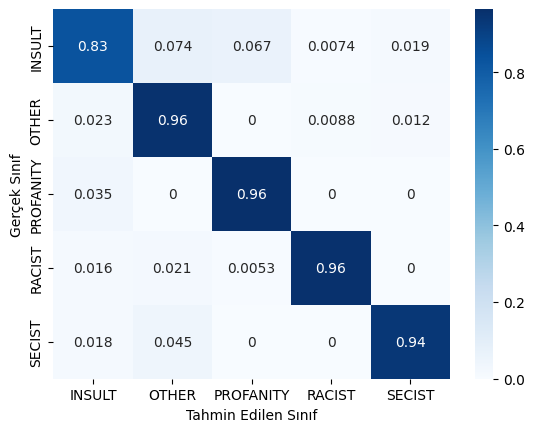

In [ ]:
def conf_matrix(y_test,y_pred):
  cm = confusion_matrix(y_test,y_pred, normalize="true")
  sns.heatmap(cm, annot=True, cmap="Blues",xticklabels=["INSULT","OTHER","PROFANITY","RACIST","SECIST"],yticklabels=["INSULT","OTHER","PROFANITY","RACIST","SECIST"] )
  plt.xlabel('Tahmin Edilen Sınıf')
  plt.ylabel('Gerçek Sınıf')
  plt.show()
conf_matrix(np.array(y_pred_tensor.cpu()), np.array(y_test_tensor.cpu()))

In [ ]:
from sklearn.metrics import f1_score
f1_score(np.array(y_test_tensor.cpu()),np.array(y_pred_tensor.cpu()), average='macro')

0.9306338047679994